In [9]:
import pandas as pd

data = pd.read_csv("datasets/shopping.csv")

data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


#### Columns to cluster

In [10]:
x = data.drop(columns = ["CustomerID"])

x = x.rename(columns = {
  "Annual Income (k$)": "income",
  "Spending Score (1-100)": "score"
})

In [11]:
x.describe()

,income,score
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


#### Scale Values

Clustering depends on calculation distances between examples, so we need to scale the income to the range 1-99 (MinMax of spending score)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1, 99))

tx = scaler.fit_transform(x)

x["income"] = tx[:, 0]
x["score"] = tx[:, 1]

x.head()

,income,score
0,1.000000,39.0
1,1.000000,81.0
2,1.803279,6.0
3,1.803279,77.0
4,2.606557,40.0


#### Find the best linkage method and clusters number

In [16]:
from scipy.cluster.hierarchy import linkage

single_linkage = linkage(x, method = "single", metric="euclidean")
complete_linkage = linkage(x, method = "complete", metric="euclidean")
average_linkage = linkage(x, method = "average", metric="euclidean")
ward_linkage = linkage(x, method = "ward", metric="euclidean")

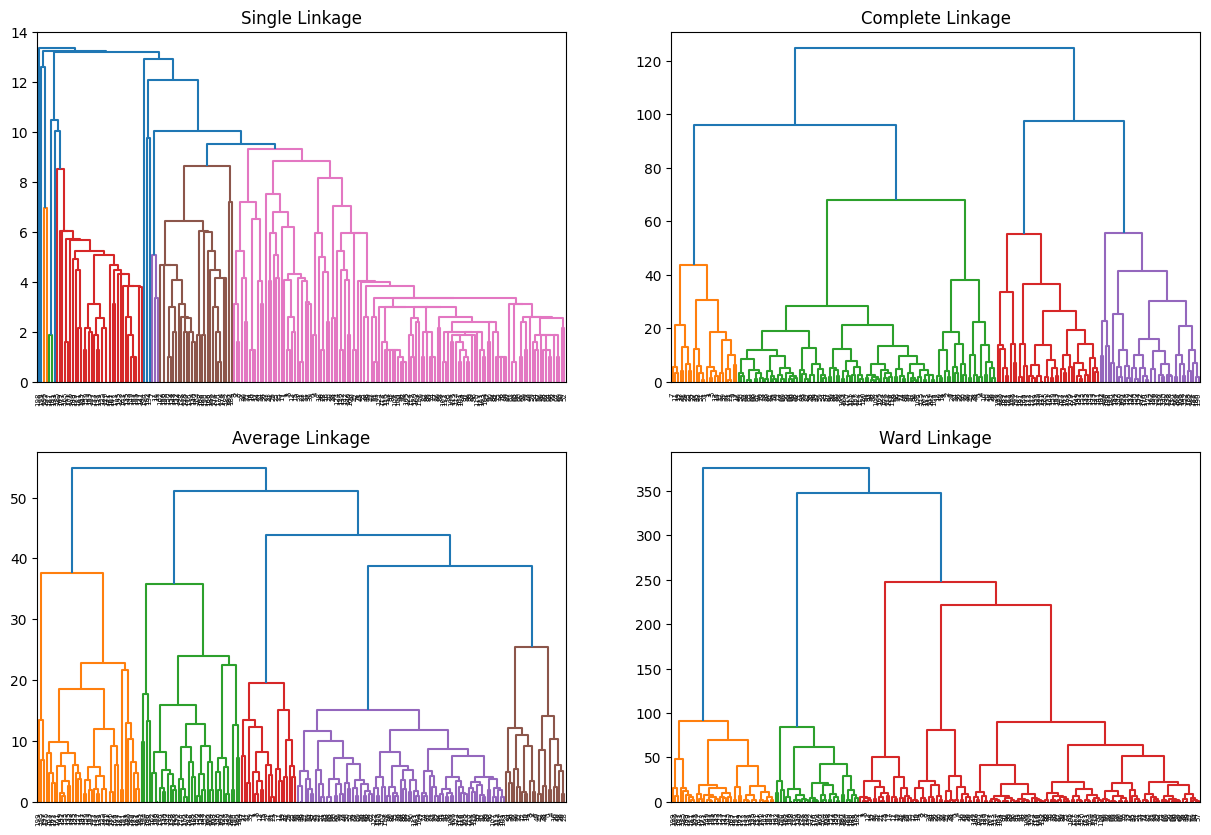

In [17]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1), dendrogram(single_linkage), plt.title("Single Linkage")
plt.subplot(2, 2, 2), dendrogram(complete_linkage), plt.title("Complete Linkage")
plt.subplot(2, 2, 3), dendrogram(average_linkage), plt.title("Average Linkage")
plt.subplot(2, 2, 4), dendrogram(ward_linkage), plt.title("Ward Linkage")

plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering

# best clusters number calculate for ward linkage above
n_clusters = 5

model = AgglomerativeClustering(n_clusters, linkage = "ward")

model.fit_predict(data)

# return the cluster index that each example belongs to
model.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

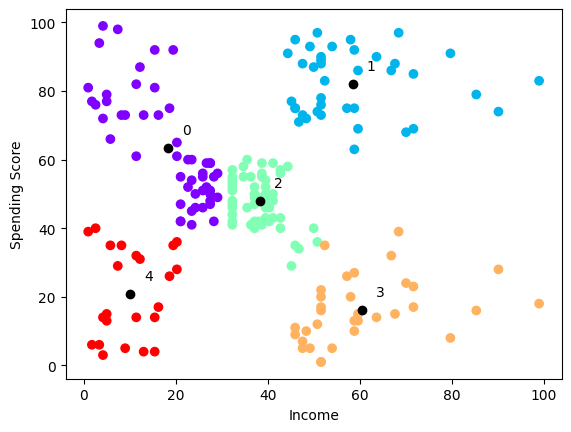

In [42]:
import numpy as np

plt.scatter(x["income"], x["score"], c = model.labels_, cmap = "rainbow")
plt.xlabel("Income")
plt.ylabel("Spending Score")

# find each cluster center
clusters = np.unique(model.labels_)
centroids = []

for cluster in clusters:
  # examples (by index) that belong to the cluster index
  examples = np.array([
    x["income"][cluster == model.labels_],
    x["score"][cluster == model.labels_],

    # Transpose from [[x1, x2, xn], [y1, y2, yn]] to [[x1, y1], [x2, y2], [xn, yn]]
  ]).T

  # axis 0 to find the mean over x axis in each example
  centroid = np.mean(examples, axis = 0)

  centroids.append(centroid)

# plot cluster centers and show the index for each one
for i, centroid in enumerate(centroids):
  plt.scatter(centroid[0], centroid[1], color = "black")
  plt.annotate(i, xy = centroid, textcoords = "offset points", xytext = (10, 10))

plt.show()

#### Filter Customers (High Income, High Spending Score)

In [43]:
customer_cluster_data = pd.DataFrame()

customer_cluster_data["customer_id"] = data["CustomerID"]
customer_cluster_data["cluster"] = model.labels_
customer_cluster_data[customer_cluster_data["cluster"] == 1]

,customer_id,cluster
123,124,1
125,126,1
127,128,1
129,130,1
131,132,1
133,134,1
135,136,1
137,138,1
139,140,1
141,142,1
